The goal of this analysis is to select the predictor variables that affect negatively or positively the target variable, life expectancy.

In [1]:
# loaded the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
# load dataset
life_expect_df = pd.read_csv('life_expectancy_data.csv')

In [3]:
# view the first few rows
life_expect_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# list columns to check the names and whether or not they need to be renamed
life_expect_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# columns need to be renamed
life_expect_df = life_expect_df.rename(columns={'Life expectancy ':'Life_Expectancy',
                               'Adult Mortality':'Adult_Mortality',
                              'infant deaths':'Infant_Deaths',
                              'percentage expenditure':'Percentage_Expenditure',
                              'Hepatitis B':'Hepatitis_B',
                              'Measles ':'Measles',' BMI ':'BMI',
                              'under-five deaths ':'Under_Five_Deaths',
                              'Total expenditure':'Total_Expenditure',
                              'Diphtheria ':'Diphtheria',
                              ' HIV/AIDS':'HIV_AIDS',
                              ' thinness  1-19 years':'Thinness_1_19_Years',
                                                ' thinness 5-9 years':'Thinness_5_9_Years',
                                                'Income composition of resources':'Income_Composition_of_Resources'})

In [6]:
# view the shape of the dataset 2938 rows and 22 columns
life_expect_df.shape

(2938, 22)

There are 2,938 observations and 22 variables.

In [7]:
# inspecting the colums for datatypes
life_expect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life_Expectancy                    2928 non-null float64
Adult_Mortality                    2928 non-null float64
Infant_Deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage_Expenditure             2938 non-null float64
Hepatitis_B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
Under_Five_Deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total_Expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV_AIDS                           2938 non-null

According to the info above, there are missing values in multiple columns.  The missing values will be dealt with later in this analysis.  There are two categorical variables: Status and Country.  The other 20 variables are numerical variables including the target variable.

In [8]:
# list the descriptive statistics
life_expect_df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_Years,Thinness_5_9_Years,Income_Composition_of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Correcting Missing Values

In [9]:
# ratios of missing values in each column
life_expect_df.isnull().sum()*100/life_expect_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life_Expectancy                     0.340368
Adult_Mortality                     0.340368
Infant_Deaths                       0.000000
Alcohol                             6.603131
Percentage_Expenditure              0.000000
Hepatitis_B                        18.822328
Measles                             0.000000
BMI                                 1.157250
Under_Five_Deaths                   0.000000
Polio                               0.646698
Total_Expenditure                   7.692308
Diphtheria                          0.646698
HIV_AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
Thinness_1_19_Years                 1.157250
Thinness_5_9_Years                  1.157250
Income_Composition_of_Resources     5.684139
Schooling                           5.547992
dtype: flo

In [10]:
# Created a list of the columns connected to the unique country.
countries = life_expect_df.Country.unique()
fill_list = ['Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B', 'BMI',
            'Polio', 'Total_Expenditure', 'Diphtheria', 'GDP', 'Population', 'Thinness_1_19_Years',
            'Thinness_5_9_Years', 'Income_Composition_of_Resources', 'Schooling']

In [11]:
# Treat null values with interpolation because this is a time series
for country in countries:
    life_expect_df.loc[life_expect_df['Country'] == country, fill_list] = life_expect_df.loc[life_expect_df['Country'] == country, fill_list].interpolate()

# Drop the rest of the null values after interpolation.
life_expect_df.dropna(inplace=True)    

In [12]:
# Check for null values after interpolation.  There are no more null values.
life_expect_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
Thinness_1_19_Years                0
Thinness_5_9_Years                 0
Income_Composition_of_Resources    0
Schooling                          0
dtype: int64

# Detecting Outliers

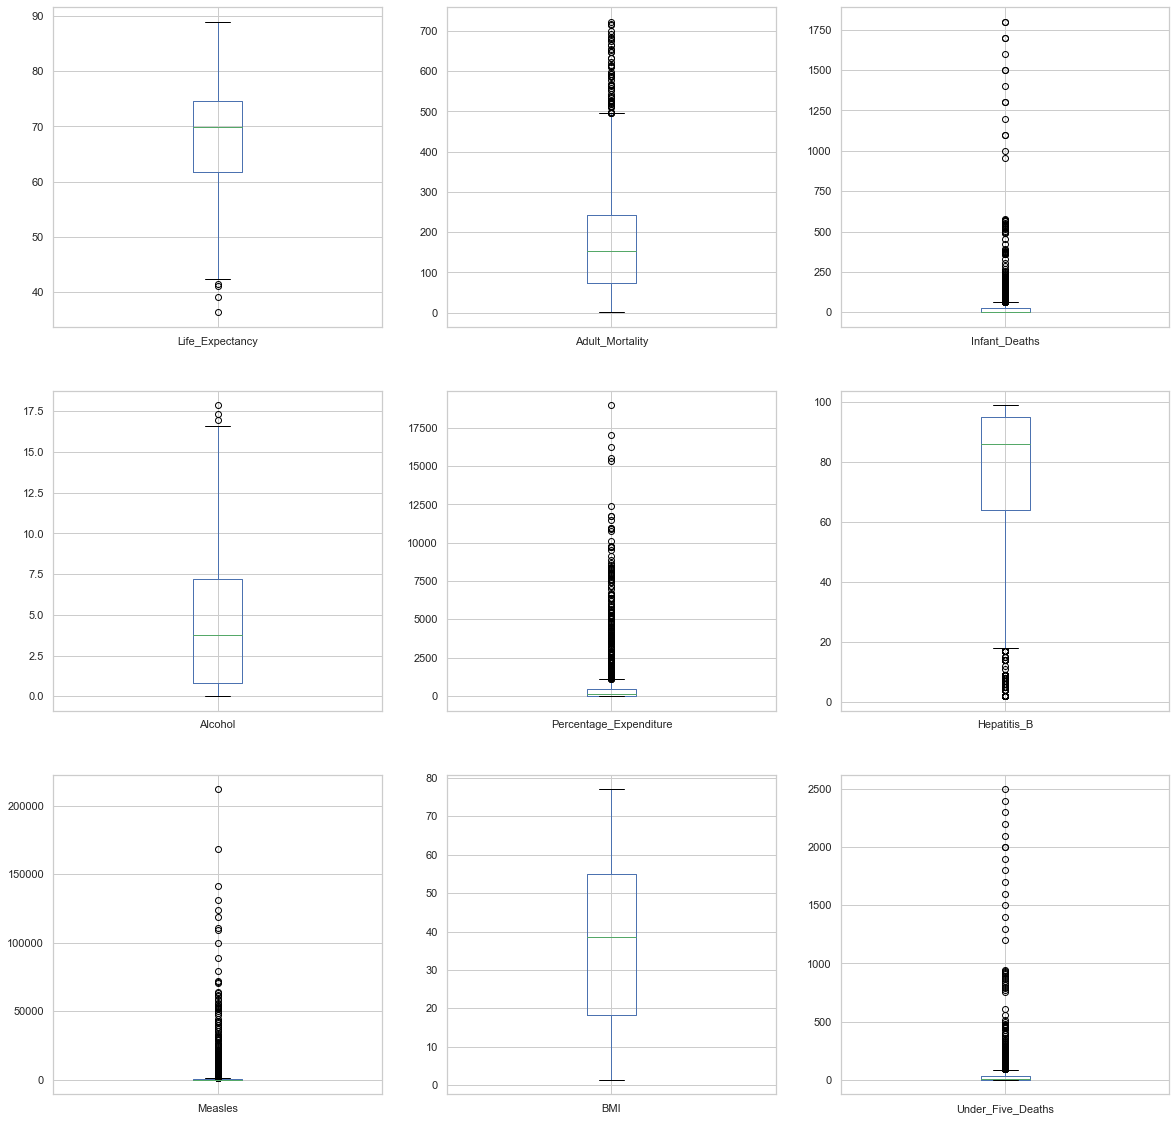

In [13]:
# Detecting outliers through plotting box plots
plt.figure(figsize=(20,20))
for i, col in enumerate(['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol',
                        'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths'
                        ], start=1):
    plt.subplot(3, 3, i)
    life_expect_df.boxplot(col,whis=1.5)
    
plt.show()

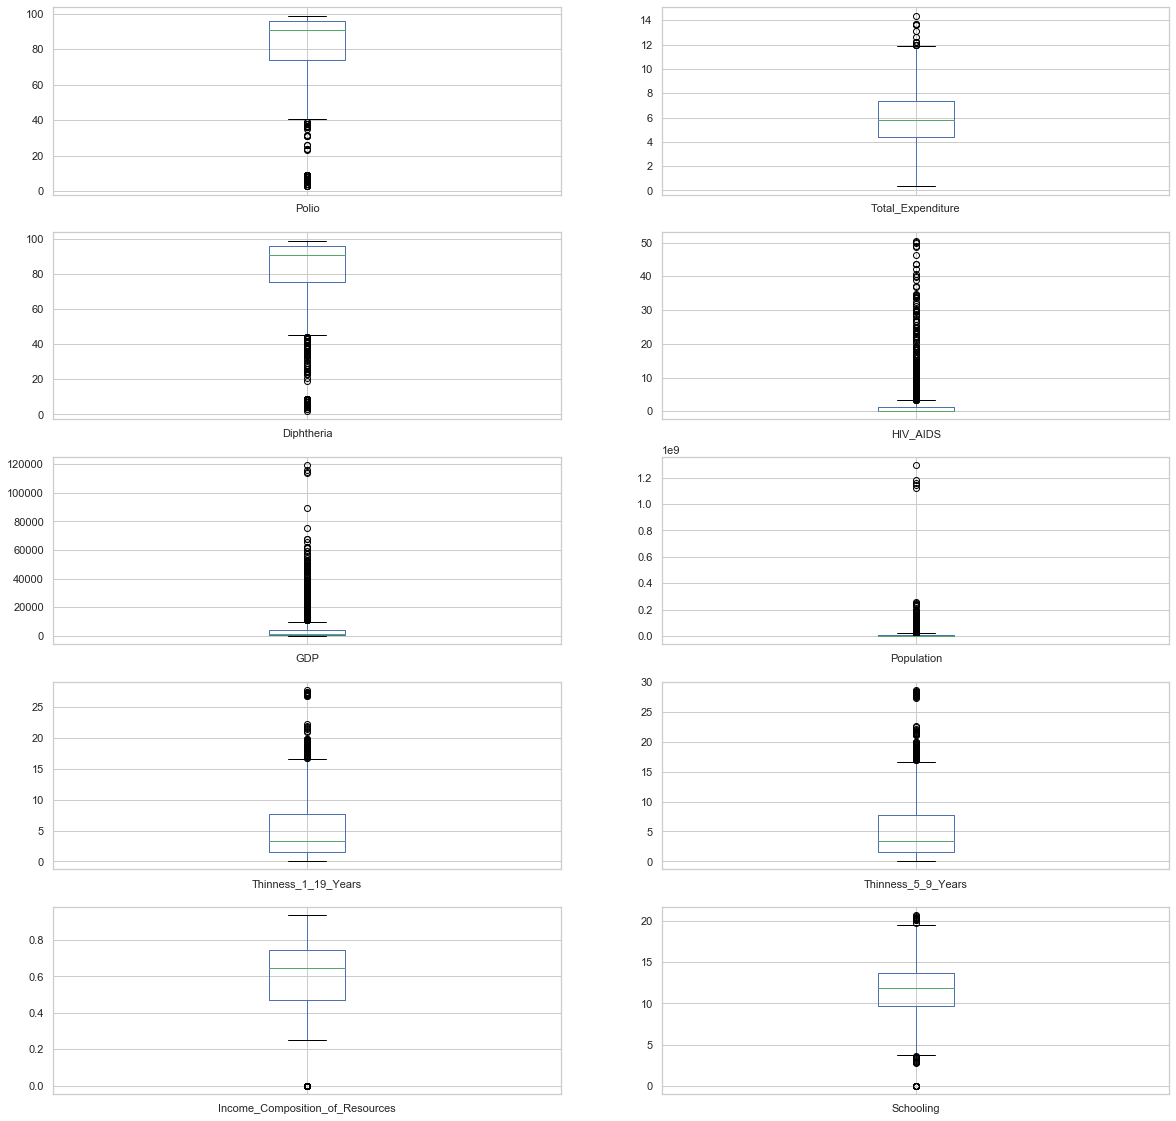

In [14]:
# Detecting outliers through plotting box plots
plt.figure(figsize=(20,20))
for i, col in enumerate(['Polio', 'Total_Expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_19_Years',
                        'Thinness_5_9_Years', 'Income_Composition_of_Resources', 'Schooling'], start=1):
    plt.subplot(5, 2, i)
    life_expect_df.boxplot(col,whis=1.5)
    
plt.show()

In [15]:
# Calculate number of outliers and its percentage with Tukey's method.
for i, col in enumerate(['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol',
                        'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths',
                         'Polio', 'Total_Expenditure', 'Diphtheria', 'GDP', 'Population', 'HIV_AIDS',
                         'Thinness_1_19_Years', 'Thinness_5_9_Years', 'Income_Composition_of_Resources', 
                         'Schooling'], start=1):
    q75, q25 = np.percentile(life_expect_df[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
                                                                            len((np.where((life_expect_df[col] > max_val) | 
                                                                                           (life_expect_df[col] < min_val))[0])),
                                                                             len((np.where((life_expect_df[col] > max_val) | 
                                                                                           (life_expect_df[col] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Expenditure : 232 and 11.675893306492199
Number of outliers and percentage of it in Hepatitis_B : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Total_Expenditure : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of

According to the list of outliers, almost all the numerical variables have outliers except for BMI.  BMI will not be winsorized.

# Correcting Outliers
with Winsorization.

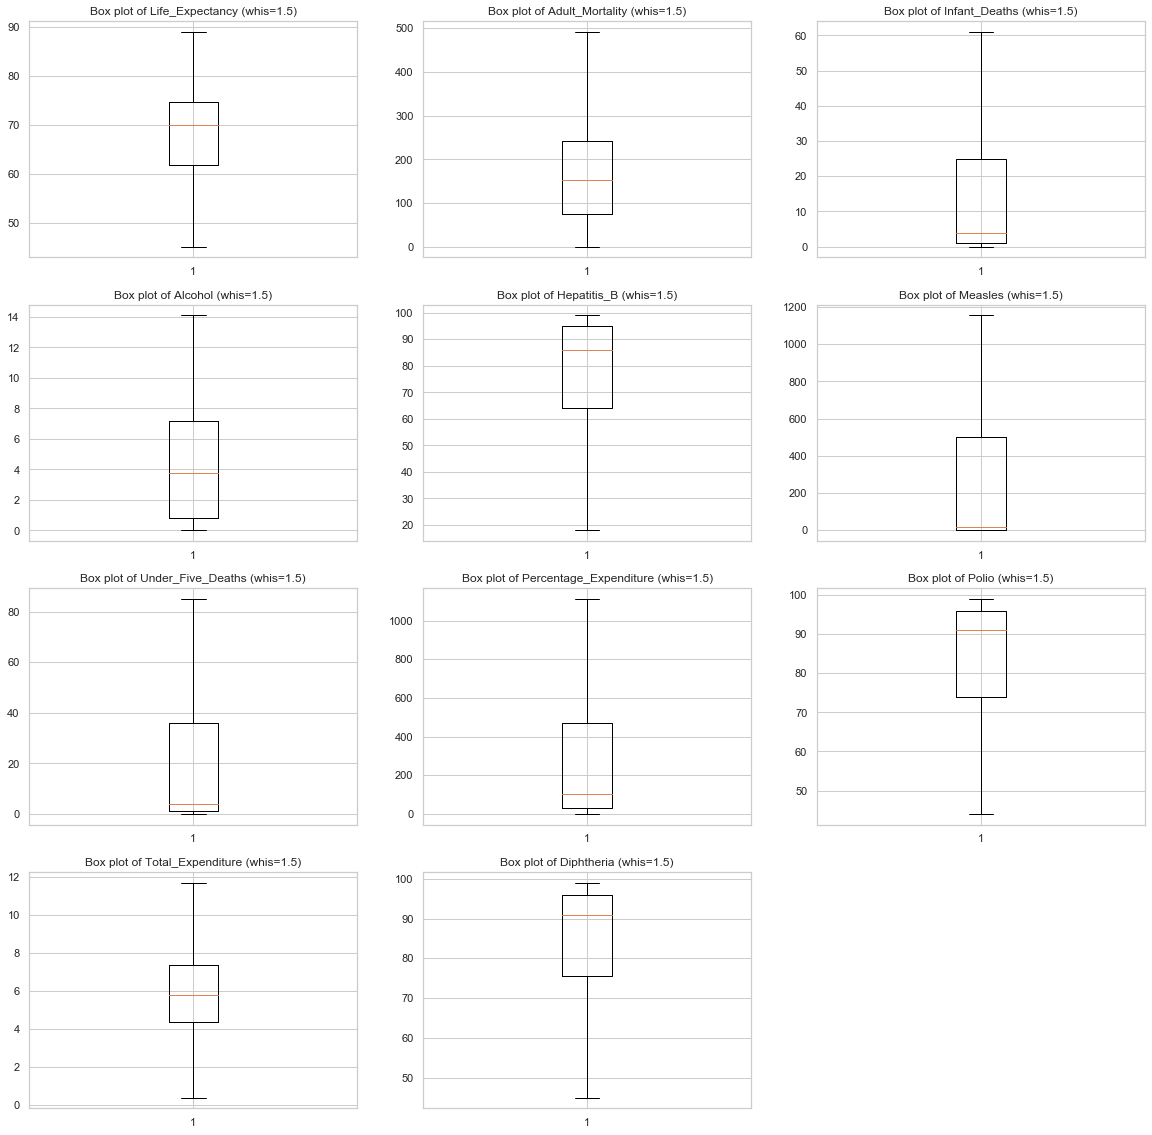

In [16]:
# Winsorize the first 9 columns with outliers in them and plotting them.
import scipy
import scipy.stats
from scipy.stats.mstats import winsorize
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
winsorized_Life_Expectancy = winsorize(life_expect_df["Life_Expectancy"], (0.01, 0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("Box plot of Life_Expectancy (whis=1.5)")

plt.subplot(4,3,2)
winsorized_Adult_Mortality = winsorize(life_expect_df["Adult_Mortality"], (0, 0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("Box plot of Adult_Mortality (whis=1.5)")

plt.subplot(4,3,3)
winsorized_Infant_Deaths = winsorize(life_expect_df["Infant_Deaths"], (0, 0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("Box plot of Infant_Deaths (whis=1.5)")

plt.subplot(4,3,4)
winsorized_Alcohol = winsorize(life_expect_df["Alcohol"], (0, 0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("Box plot of Alcohol (whis=1.5)")

plt.subplot(4,3,5)
winsorized_Hepatitis_B = winsorize(life_expect_df["Hepatitis_B"], (0.11, 0))
plt.boxplot(winsorized_Hepatitis_B)
plt.title("Box plot of Hepatitis_B (whis=1.5)")

plt.subplot(4,3,6)
winsorized_Measles = winsorize(life_expect_df["Measles"], (0, 0.19))
plt.boxplot(winsorized_Measles)
plt.title("Box plot of Measles (whis=1.5)")

plt.subplot(4,3,7)
winsorized_Under_Five_Deaths = winsorize(life_expect_df["Under_Five_Deaths"], (0, 0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("Box plot of Under_Five_Deaths (whis=1.5)")

plt.subplot(4,3,8)
winsorized_Percentage_Expenditure = winsorize(life_expect_df["Percentage_Expenditure"], (0, 0.12))
plt.boxplot(winsorized_Percentage_Expenditure)
plt.title("Box plot of Percentage_Expenditure (whis=1.5)")

plt.subplot(4,3,9)
winsorized_Polio = winsorize(life_expect_df["Polio"], (0.09, 0))
plt.boxplot(winsorized_Polio)
plt.title("Box plot of Polio (whis=1.5)")

plt.subplot(4,3,10)
winsorized_Total_Expenditure = winsorize(life_expect_df["Total_Expenditure"], (0, 0.01))
plt.boxplot(winsorized_Total_Expenditure)
plt.title("Box plot of Total_Expenditure (whis=1.5)")

plt.subplot(4,3,11)
winsorized_Diphtheria = winsorize(life_expect_df["Diphtheria"], (0.1, 0))
plt.boxplot(winsorized_Diphtheria)
plt.title("Box plot of Diphtheria (whis=1.5)")

plt.show()

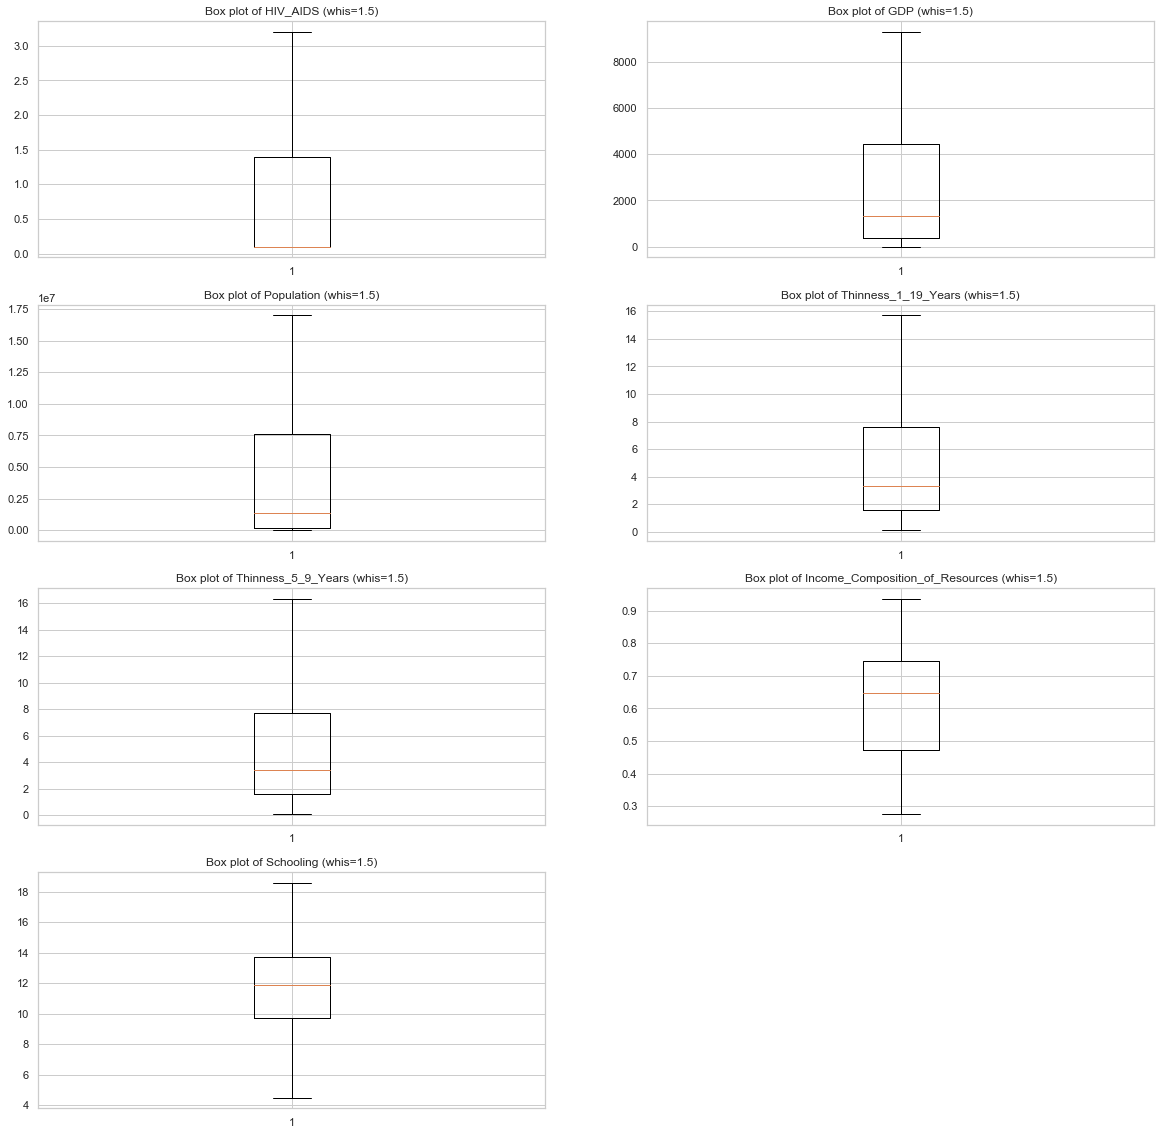

In [17]:
# Winsorize the next 9 columns with outliers in them and plotting them.     
import scipy
import scipy.stats
from scipy.stats.mstats import winsorize
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
winsorized_HIV_AIDS = winsorize(life_expect_df["HIV_AIDS"], (0, 0.16))
plt.boxplot(winsorized_HIV_AIDS)
plt.title("Box plot of HIV_AIDS (whis=1.5)")

plt.subplot(4,2,2)
winsorized_GDP = winsorize(life_expect_df["GDP"], (0, 0.13))
plt.boxplot(winsorized_GDP)
plt.title("Box plot of GDP (whis=1.5)")

plt.subplot(4,2,3)
winsorized_Population = winsorize(life_expect_df["Population"], (0, 0.14))
plt.boxplot(winsorized_Population)
plt.title("Box plot of Population (whis=1.5)")

plt.subplot(4,2,4)
winsorized_Thinness_1_19_Years = winsorize(life_expect_df["Thinness_1_19_Years"], (0, 0.04))
plt.boxplot(winsorized_Thinness_1_19_Years)
plt.title("Box plot of Thinness_1_19_Years (whis=1.5)")

plt.subplot(4,2,5)
winsorized_Thinness_5_9_Years = winsorize(life_expect_df["Thinness_5_9_Years"], (0, 0.04))
plt.boxplot(winsorized_Thinness_5_9_Years)
plt.title("Box plot of Thinness_5_9_Years (whis=1.5)")

plt.subplot(4,2,6)
winsorized_Income_Composition_of_Resources = winsorize(life_expect_df["Income_Composition_of_Resources"], (0.05, 0))
plt.boxplot(winsorized_Income_Composition_of_Resources)
plt.title("Box plot of Income_Composition_of_Resources (whis=1.5)")

plt.subplot(4,2,7)
winsorized_Schooling = winsorize(life_expect_df["Schooling"], (0.02, 0.01))
plt.boxplot(winsorized_Schooling)
plt.title("Box plot of Schooling (whis=1.5)")


plt.show()

In [18]:
# Check for outliers after winsorization
winsor_list = [winsorized_Life_Expectancy, winsorized_Adult_Mortality, winsorized_Infant_Deaths, winsorized_Alcohol,
               winsorized_Percentage_Expenditure, winsorized_Hepatitis_B, winsorized_Measles, winsorized_Under_Five_Deaths,
               winsorized_Polio, winsorized_Total_Expenditure, winsorized_Diphtheria, winsorized_GDP, winsorized_Population,
               winsorized_HIV_AIDS, winsorized_Thinness_1_19_Years, winsorized_Thinness_5_9_Years, winsorized_Income_Composition_of_Resources,
               winsorized_Schooling]

for col in winsor_list:
    q75, q25 = np.percentile(col, [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((col > max_val) | (col < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [19]:
# Add variables to the dataframe
life_expect_df['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
life_expect_df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
life_expect_df['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
life_expect_df['winsorized_Alcohol'] = winsorized_Alcohol
life_expect_df['winsorized_Percentage_Expenditure'] = winsorized_Percentage_Expenditure
life_expect_df['winsorized_Hepatitis_B'] = winsorized_Hepatitis_B
life_expect_df['winsorized_Measles'] = winsorized_Measles
life_expect_df['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
life_expect_df['winsorized_Polio'] = winsorized_Polio
life_expect_df['winsorized_Total_Expenditure'] = winsorized_Total_Expenditure
life_expect_df['winsorized_Diphtheria'] = winsorized_Diphtheria
life_expect_df['winsorized_GDP'] = winsorized_GDP
life_expect_df['winsorized_Population'] = winsorized_Population
life_expect_df['winsorized_HIV_AIDS'] = winsorized_HIV_AIDS
life_expect_df['winsorized_Thinness_1_19_Years'] = winsorized_Thinness_1_19_Years
life_expect_df['winsorized_Thinness_5_9_Years'] = winsorized_Thinness_5_9_Years
life_expect_df['winsorized_Income_Composition_of_Resources'] = winsorized_Income_Composition_of_Resources
life_expect_df['winsorized_Schooling'] = winsorized_Schooling

In [20]:
# Validate the columns were added
life_expect_df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,winsorized_Polio,winsorized_Total_Expenditure,winsorized_Diphtheria,winsorized_GDP,winsorized_Population,winsorized_HIV_AIDS,winsorized_Thinness_1_19_Years,winsorized_Thinness_5_9_Years,winsorized_Income_Composition_of_Resources,winsorized_Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,44.0,8.16,65.0,584.259210,16993354.0,0.1,15.7,16.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,612.696514,327582.0,0.1,15.7,16.3,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,631.744976,16993354.0,0.1,15.7,16.3,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,669.959000,3696958.0,0.1,15.7,16.3,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,63.537231,2978599.0,0.1,15.7,16.3,0.454,9.5


# Exploratory Data Analysis

In [21]:
# Display the descriptive statistics for the continuous variables
life_expect_df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Deaths,...,winsorized_Polio,winsorized_Total_Expenditure,winsorized_Diphtheria,winsorized_GDP,winsorized_Population,winsorized_HIV_AIDS,winsorized_Thinness_1_19_Years,winsorized_Thinness_5_9_Years,winsorized_Income_Composition_of_Resources,winsorized_Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,...,82.957725,5.895471,83.225969,2864.719760,4.799769e+06,0.874082,4.955561,5.024006,0.616143,11.658581
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,...,17.556131,2.266421,17.239348,3186.069874,6.217060e+06,1.183198,4.187776,4.265385,0.174584,3.102260
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,...,44.000000,0.370000,45.000000,1.681350,3.400000e+01,0.100000,0.100000,0.100000,0.276000,4.500000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,...,74.000000,4.360000,75.500000,384.553107,1.967480e+05,0.100000,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,...,91.000000,5.800000,91.000000,1334.651896,1.396861e+06,0.100000,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,...,96.000000,7.385000,96.000000,4441.530655,7.625918e+06,1.400000,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,...,99.000000,11.700000,99.000000,9291.227619,1.699335e+07,3.200000,15.700000,16.300000,0.936000,18.600000


In [22]:
# Display the column names with winsorized variables
life_expect_df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_19_Years',
       'Thinness_5_9_Years', 'Income_Composition_of_Resources', 'Schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Expenditure', 'winsorized_Hepatitis_B',
       'winsorized_Measles', 'winsorized_Under_Five_Deaths',
       'winsorized_Polio', 'winsorized_Total_Expenditure',
       'winsorized_Diphtheria', 'winsorized_GDP', 'winsorized_Population',
       'winsorized_HIV_AIDS', 'winsorized_Thinness_1_19_Years',
       'winsorized_Thinness_5_9_Years',
       'winsorized_Income_Composition_of_Resources', 'winsorized_Schooling'],
      dtype='object')

Let's investigate the distributions of the variables with outliers and winsorized variables.

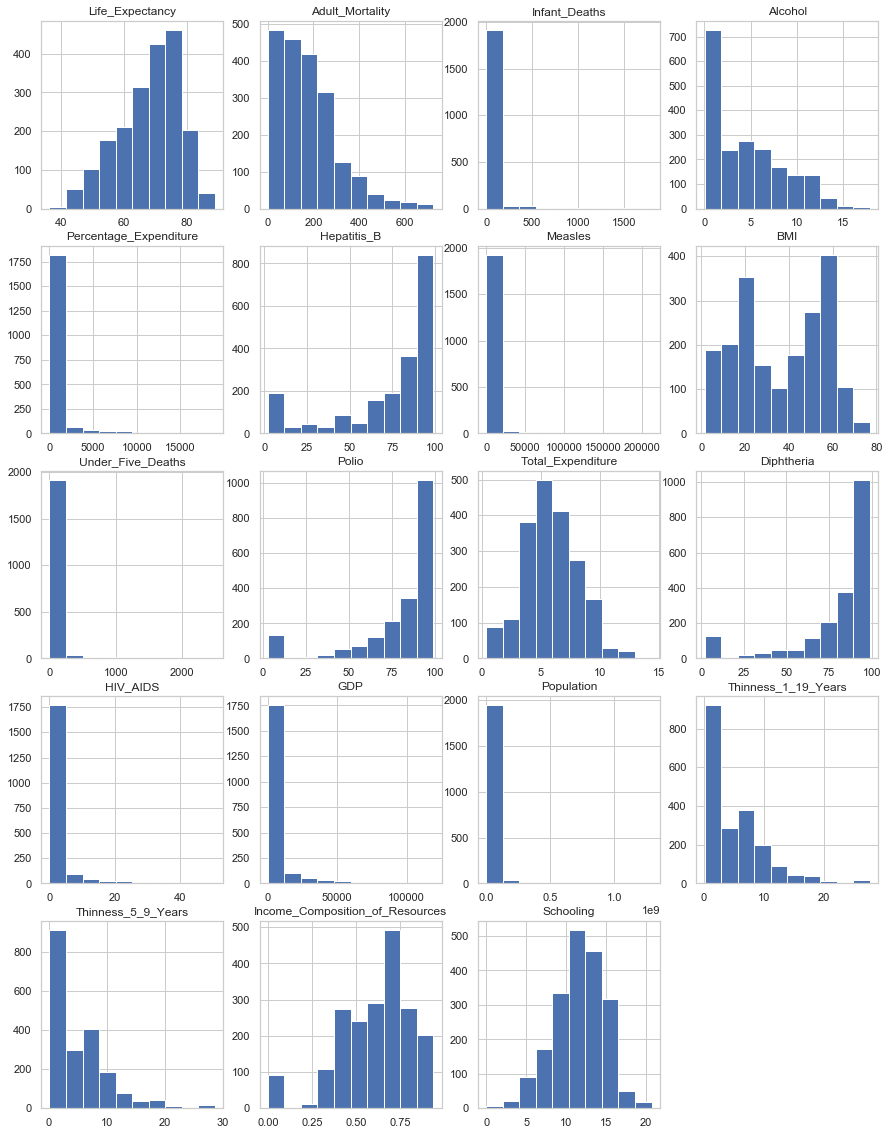

In [23]:
# Display the histograms for the continuous variables 
all_columns = ['Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_19_Years',
       'Thinness_5_9_Years', 'Income_Composition_of_Resources', 'Schooling',
       ]

plt.figure(figsize=(15, 20))

for i in range(len(all_columns)):
    plt.subplot(5, 4, i + 1)
    plt.hist(life_expect_df[all_columns[i]])
    plt.title(all_columns[i])
    
plt.show()

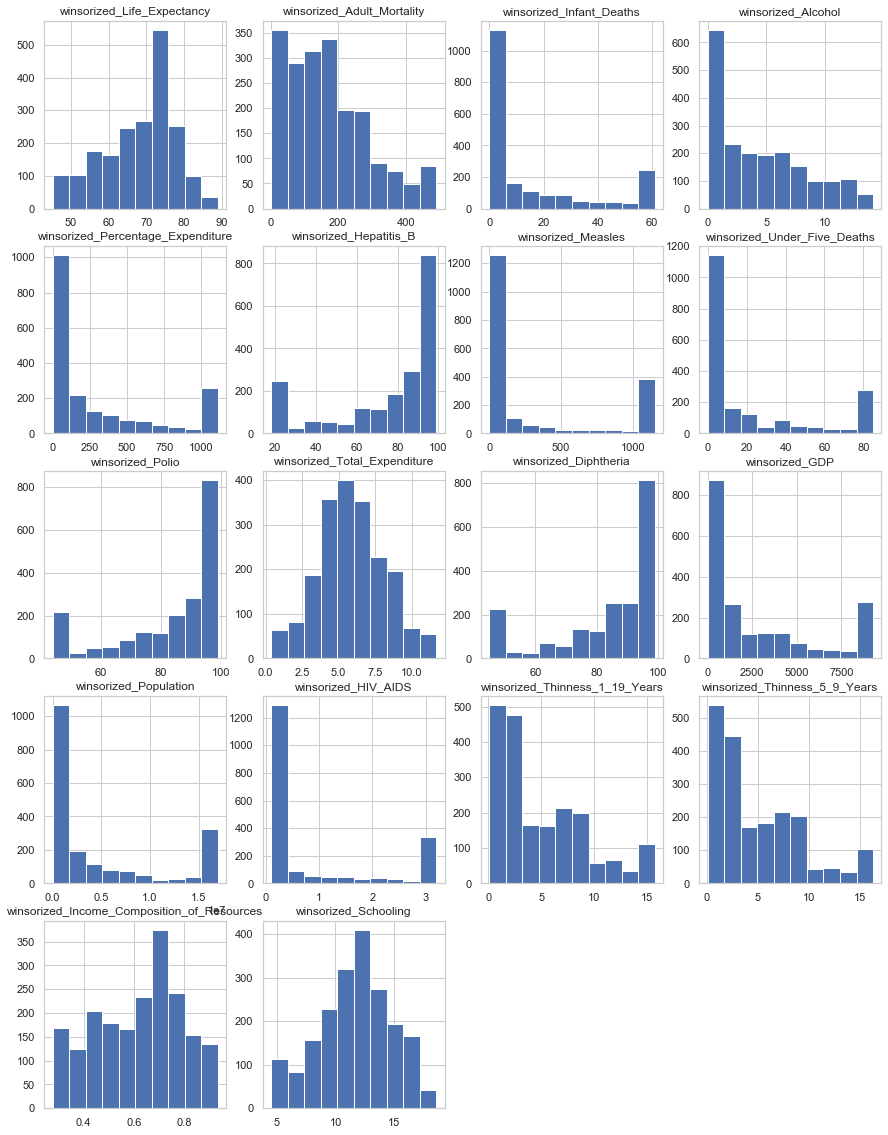

In [24]:
# Display the histograms for the winsorized continuous variables 

win_all_columns = ['winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Expenditure', 'winsorized_Hepatitis_B',
       'winsorized_Measles', 'winsorized_Under_Five_Deaths',
       'winsorized_Polio', 'winsorized_Total_Expenditure',
       'winsorized_Diphtheria', 'winsorized_GDP', 'winsorized_Population',
       'winsorized_HIV_AIDS', 'winsorized_Thinness_1_19_Years',
       'winsorized_Thinness_5_9_Years',
       'winsorized_Income_Composition_of_Resources', 'winsorized_Schooling']

plt.figure(figsize=(15, 20))

for i in range(len(win_all_columns)):
    plt.subplot(5, 4, i + 1)
    plt.hist(life_expect_df[win_all_columns[i]])
    plt.title(win_all_columns[i])
    
plt.show()

After winorization, the two variables, winsorized_Total_Expenditures and winsorized_Schooling look somewhat normally distributed.  If the variables needed to be normally distributed for a machine learning model, we could transform them by taking the square root, inverse, log of the variable, or by applying Box-Cox transformation.  Winsorization is used to treat the outliers of the variables.

In [25]:
# Descriptive statistics of categorical variables.
life_expect_df.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


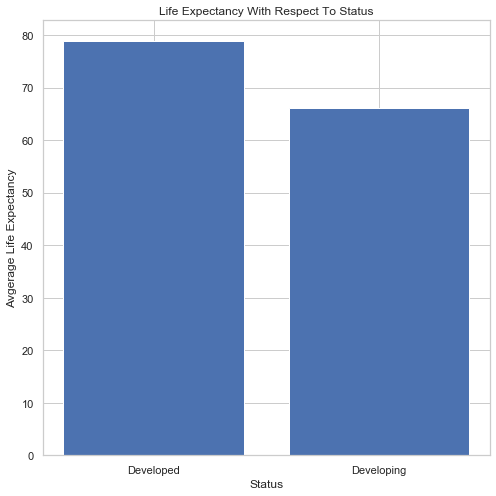

In [30]:
# Life expectancy with respect to country's status using bar plot.
plt.figure(figsize=(8,8))
plt.bar(life_expect_df.groupby('Status')['Status'].count().index, life_expect_df.groupby('Status')
        ['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status", fontsize=12)
plt.ylabel("Avgerage Life Expectancy", fontsize=12)
plt.title("Life Expectancy With Respect To Status")
plt.show()

According to the bar plot, Developed status of a country indicates there is a higher life expectancy than Developing status of a country.

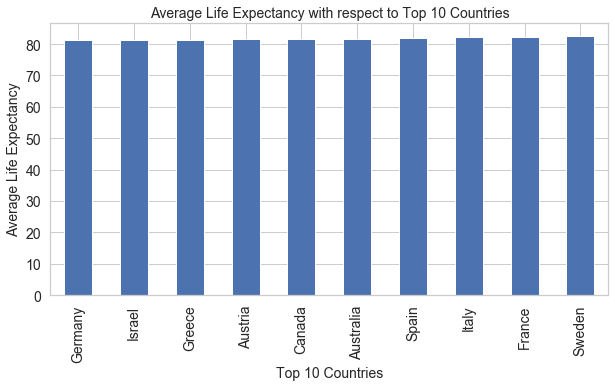

In [56]:
# Average life expectancy by country.  Top 10 life expectancy bar graph.
top10_life_expect_country = sorted_life_expect_country.groupby('Country')['winsorized_Life_Expectancy'].mean().sort_values()[-10:]
top10_life_expect_country.plot(kind='bar', figsize=(10, 5), fontsize=14)
plt.title('Average Life Expectancy with respect to Top 10 Countries', fontsize=14)
plt.xlabel('Top 10 Countries', fontsize=14)
plt.ylabel('Average Life Expectancy', fontsize=14)
plt.show()

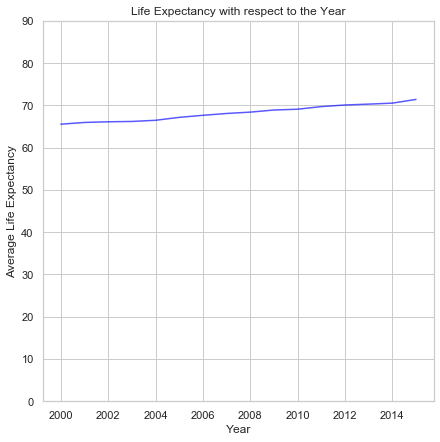

In [57]:
# Life expectancy with respect to the year using a line graph
plt.figure(figsize=(7,7))
plt.plot(life_expect_df.groupby('Year')['Year'].count().index, life_expect_df.groupby('Year')['winsorized_Life_Expectancy'].mean(), color='blue', alpha=0.65)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Life Expectancy", fontsize=12)
plt.yticks(np.arange(0, 100, step=10))
plt.title("Life Expectancy with respect to the Year")
plt.show()

According to the line graph, average life expectancy has slowly increased over 15 years. 

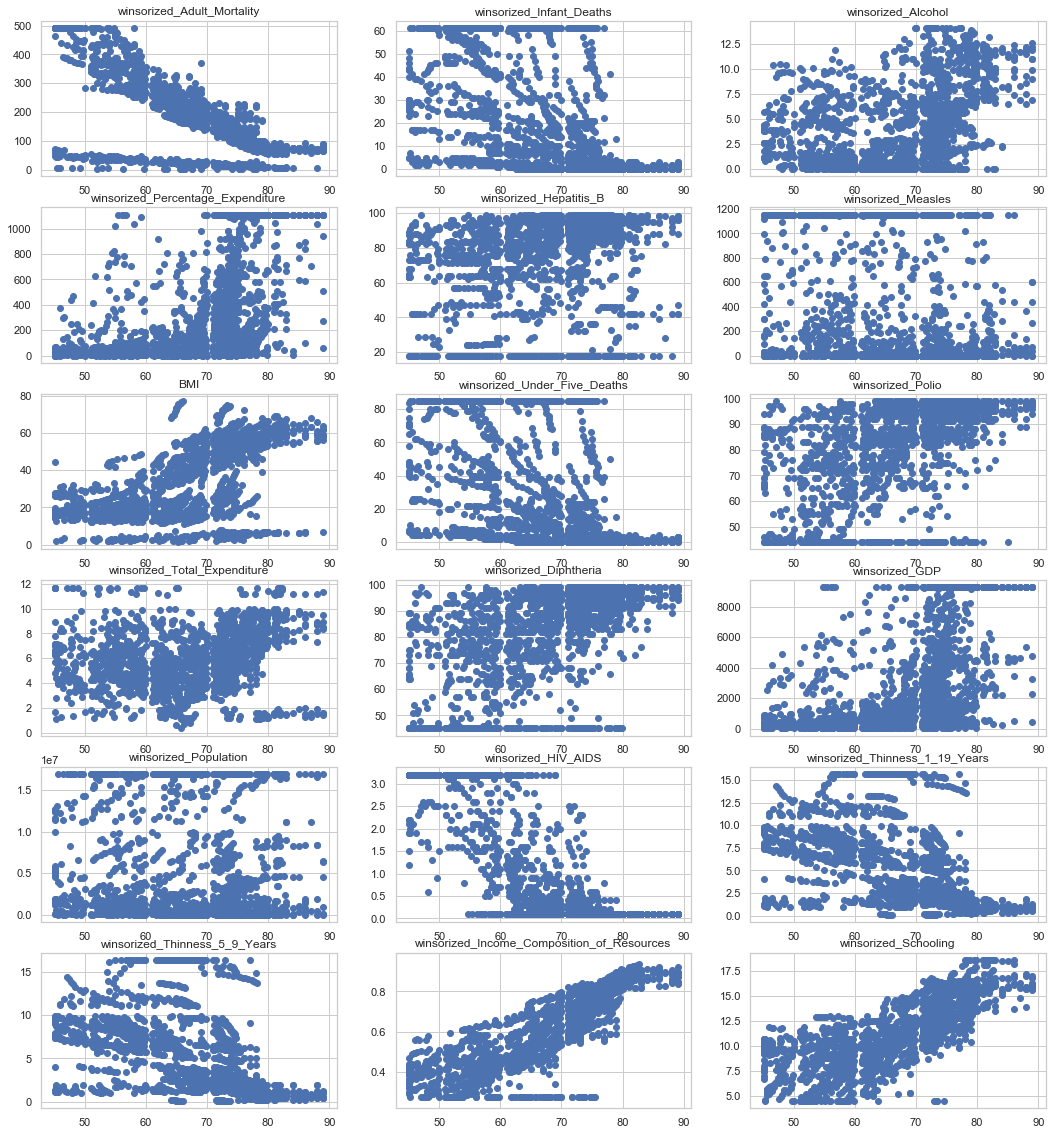

In [58]:
# Scatter plots of life expectancy versus each winsorized variable.
all_columns = ['winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Expenditure', 'winsorized_Hepatitis_B',
       'winsorized_Measles', 'BMI', 'winsorized_Under_Five_Deaths',
       'winsorized_Polio', 'winsorized_Total_Expenditure',
       'winsorized_Diphtheria', 'winsorized_GDP', 'winsorized_Population',
       'winsorized_HIV_AIDS', 'winsorized_Thinness_1_19_Years',
       'winsorized_Thinness_5_9_Years',
       'winsorized_Income_Composition_of_Resources', 'winsorized_Schooling']

plt.figure(figsize=(18, 20))

for i in range(len(all_columns)):
    plt.subplot(6, 3, i + 1)
    plt.scatter(life_expect_df['winsorized_Life_Expectancy'], life_expect_df[all_columns[i]])
    plt.title(all_columns[i])
    
plt.show()

There appear to be three predictor variables that have relationship with life expectancy.  Those three variables are winsorized_income_Composition_of_Resources, winsorized_Schooling, and winsorized_Adult_Mortality. 

In [59]:
# Creating a dataframe with winsorized columns to display the correlations after winsorization.
win_life_expect_df = life_expect_df.iloc[:, 22:]

The winsorized variables are the variables of importance because they treated the outliers.  The next think to look for are the correlations among the predictor variables and predictor variables to life expectancy. 

In [60]:
# Verifying the dataframe has all the winsorized columns.
win_life_expect_df.head()

,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Expenditure,winsorized_Hepatitis_B,winsorized_Measles,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Total_Expenditure,winsorized_Diphtheria,winsorized_GDP,winsorized_Population,winsorized_HIV_AIDS,winsorized_Thinness_1_19_Years,winsorized_Thinness_5_9_Years,winsorized_Income_Composition_of_Resources,winsorized_Schooling,Status_Num
0,65.0,263.0,61,0.01,71.279624,65.0,1154,83,44.0,8.16,65.0,584.259210,16993354.0,0.1,15.7,16.3,0.479,10.1,1
1,59.9,271.0,61,0.01,73.523582,62.0,492,85,58.0,8.18,62.0,612.696514,327582.0,0.1,15.7,16.3,0.476,10.0,1
2,59.9,268.0,61,0.01,73.219243,64.0,430,85,62.0,8.13,64.0,631.744976,16993354.0,0.1,15.7,16.3,0.470,9.9,1
3,59.5,272.0,61,0.01,78.184215,67.0,1154,85,67.0,8.52,67.0,669.959000,3696958.0,0.1,15.7,16.3,0.463,9.8,1
4,59.2,275.0,61,0.01,7.097109,68.0,1154,85,68.0,7.87,68.0,63.537231,2978599.0,0.1,15.7,16.3,0.454,9.5,1


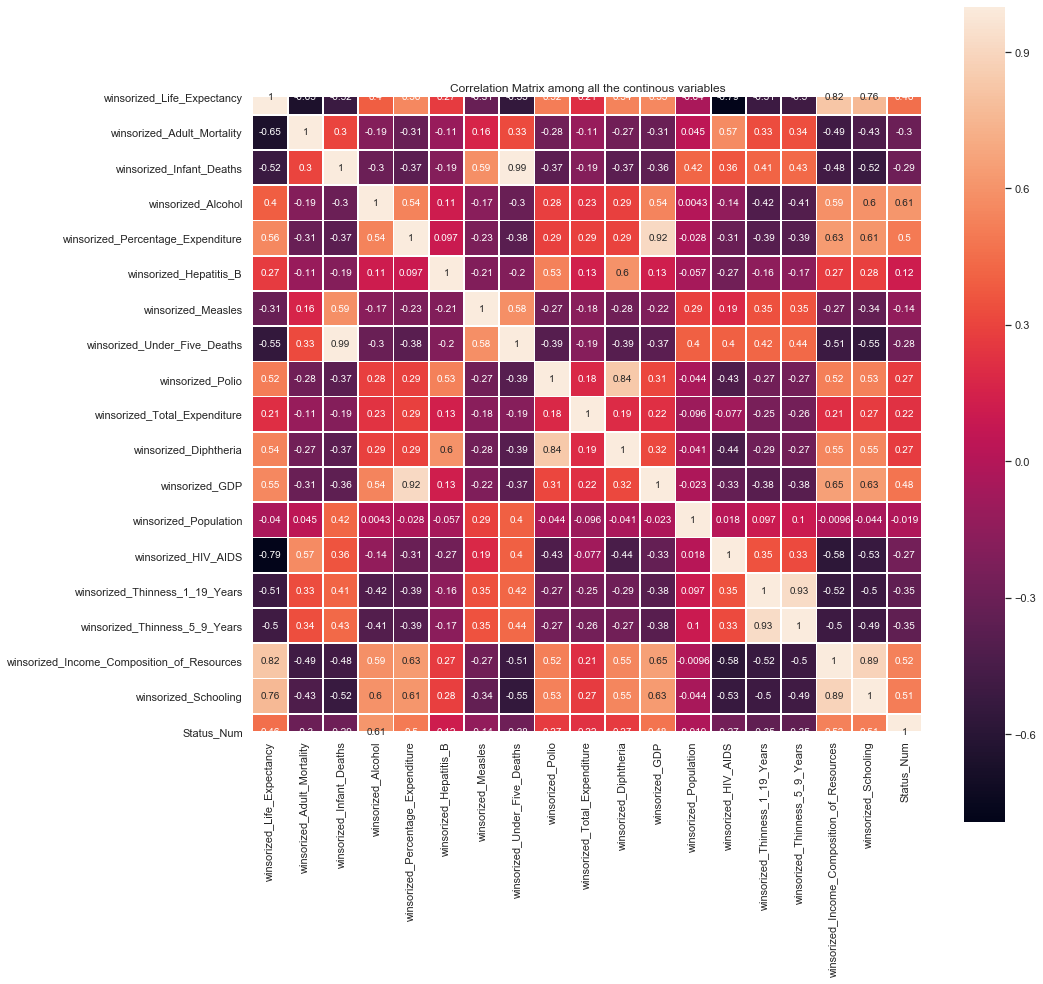

In [61]:
# Creating the correlation matrix for win_life_expect_df
corr_matrix = win_life_expect_df.corr()

# Display the correlation heatmap for win_life_expect_df
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.75)
plt.title("Correlation Matrix among all the continous variables")
plt.show()

In [62]:
# top five predictor variables with the most correlation to life expectancy.
corr_matrix['winsorized_Life_Expectancy'].sort_values(ascending=False)[1:6]

winsorized_Income_Composition_of_Resources    0.823222
winsorized_Schooling                          0.762333
winsorized_Percentage_Expenditure             0.557117
winsorized_GDP                                0.551722
winsorized_Diphtheria                         0.535687
Name: winsorized_Life_Expectancy, dtype: float64

# Feature Engineering

Based on the correlation matrix, there are predictor variables that are inter-correlated and correlated to the target variable, winsorized_Life_Expectancy.  Looking at the predictor variables, there exists high inter-correlation (corr > 0.7 or corr < -0.7) variables because of this they can influence the results of a linear model.  The list of the highly correlated variables is below, and then they will be considered to be dropped or not based on their correlation with the target variable.  The list of predictor variables highly correlated with other predictor variables are as follows:

winsorized_Under_Five_Deaths and winsorized_Adult_Mortality are highly correlated (corr = 0.99).
Since winsorized_Adult_Mortality is more correlated with the target variable than winsorized_Under_Five_Deaths, winsorized_Under_Five_Deaths will be dropped.

winsorized_Alcohol and winsorized_Percentage_Expenditure are highly correlated (corr = 0.92).
Since winsorized_Alcohol is more correlated with the target variable than winsorized_Percentage_Expenditure, winsorized_Percentage_Expenditure will be dropped.

winsorized_Under_Five_Deaths and winsorized_Diphtheria are highly correlated (corr = 0.84).
Since winsorized_Under_Five_Deaths is more correlated with the target variable than winsorized_Diphtheria, winsorized_Diphtheria will be dropped.

winsorized_Schooling and winsorized_Income_Composition_of_Resources are highly correlated (corr = 0.89).
Since winsorized_Income_Composition_of_Resources is more correlated with the target variable than winsorized_Schooling, winsorized_Schooling will be dropped.

The following list of predictor variables are not or are slightly correlated to winsorized_Life_expectancy and will be dropped:
 - winsorized_Total_Expenditures
 - winsorized_Population
 - winsorized_Hepatitis_B

Here are the variables that will be dropped:
 - winsorized_Under_Five_Deaths
 - winsorized_Percentage_Expenditure
 - winsorized_Diphtheria
 - winsorized_Schooling
 - winsorized_Total_Expenditures
 - winsorized_Population
 - winsorized_Hepatitis_B

The feature engineering is assuming the linear regression model or another regression model will be used.

In [63]:
# Dropping list of variables from win_life_expect_df.
win_life_expect_df.drop(columns=['winsorized_Under_Five_Deaths', 'winsorized_Percentage_Expenditure',
                       'winsorized_Diphtheria', 'winsorized_Schooling', 'winsorized_Total_Expenditure',
                       'winsorized_Population', 'winsorized_Hepatitis_B'], inplace=True)

In [64]:
# Verifying the variables were dropped
win_life_expect_df.head()

,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Measles,winsorized_Polio,winsorized_GDP,winsorized_HIV_AIDS,winsorized_Thinness_1_19_Years,winsorized_Thinness_5_9_Years,winsorized_Income_Composition_of_Resources,Status_Num
0,65.0,263.0,61,0.01,1154,44.0,584.259210,0.1,15.7,16.3,0.479,1
1,59.9,271.0,61,0.01,492,58.0,612.696514,0.1,15.7,16.3,0.476,1
2,59.9,268.0,61,0.01,430,62.0,631.744976,0.1,15.7,16.3,0.470,1
3,59.5,272.0,61,0.01,1154,67.0,669.959000,0.1,15.7,16.3,0.463,1
4,59.2,275.0,61,0.01,1154,68.0,63.537231,0.1,15.7,16.3,0.454,1


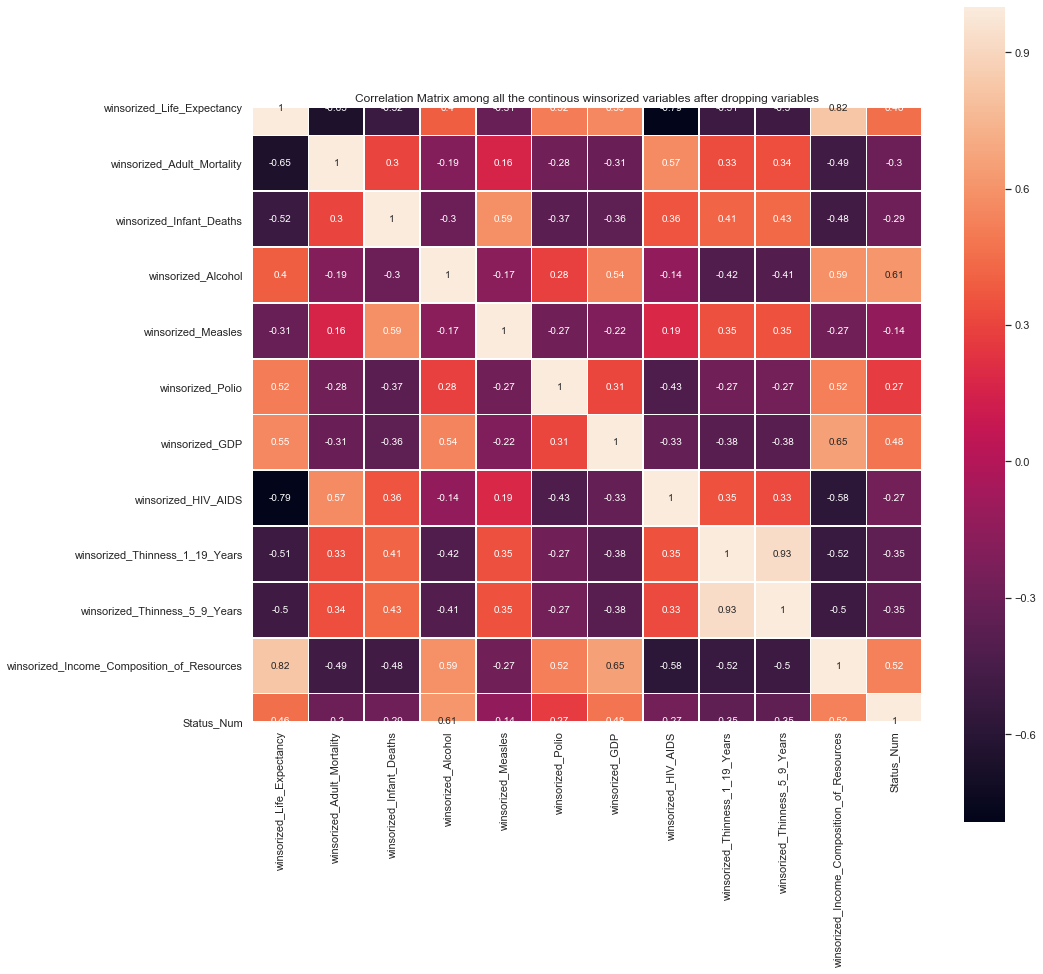

In [65]:
# Creating the correlation matrix for win_life_expect_df after dropping variables.
win_corr_matrix = win_life_expect_df.corr()

# Display the correlation heatmap for win_life_expect_df after dropping variables.
plt.figure(figsize=(15,15))
sns.heatmap(win_corr_matrix, square=True, annot=True, linewidths=.75)
plt.title("Correlation Matrix among all the continous winsorized variables after dropping variables")
plt.show()

Among the categorical variables, Year and Country are not significant enough to keep in our model, so they can eliminated.  However, Status may have a relationship with winsorized_Life_Expectancy.  There will be more exploration on Status.  

In [66]:
# Determine the higher average life expectancy of the status (developed or developing)
round(life_expect_df[['Status', 'Life_Expectancy']].groupby(['Status']).mean(), 2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


Based on the above table, Developed seems to have a higher average life expectancy than Developing.  Let's find out whether the difference is significant or not with a t-test.

In [67]:
# Executing a t-test to determine whether the difference between the average 
# life expectancy between Developed and Developing is significant or not.
import scipy.stats as stats
stats.ttest_ind(life_expect_df.loc[life_expect_df['Status']=='Developed', 'Life_Expectancy'],
               life_expect_df.loc[life_expect_df['Status']=='Developing', 'Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

Since the p-value < the level of significanc of 0.05, the difference of the average life expectancy between Developed and Developing countries is signficant, therefore Status will be considered in the model. 

Lastly, the analysis in featuring engineering assumed the goal was to predict life expectancy.  As a result, the feature engineering considered mostly correlations to determine which variables to keep and drop.  If a predictive goal is set, there needs to be further analysis on determining which features to keep or discard.  